# UNAD
## Diego Andres Arias Sanabria
## Grupo_59
## Predecir quién sobrevivió al naufragio Titanic con Regresión Logística

## Pasos de la Actividad
1. Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.
2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario
3. Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características
4. Dividir el dataset en Train y Test para evaluar correctamente el modelo
5. Entrenar el modelo configurando los diferentes hiperparámetros
6. Evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-score, etc
7. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo.
8. Interpretar, analizar y documentar los resultados obtenidos
9. Crear una cuenta en GitHub y cargar los códigos de los modelos diseñados https://github.com/ 

## 1. Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.

In [6]:
#Cargar las librerias necesarias 

import  pandas  as  pd  # Manejo y análisis de estructuras de datos 
import  numpy  as  np  # Cálculo numérico y el análisis de datos 
import  seaborn  as  sns  # Creación gráficos estadísticos 
import  matplotlib.pyplot  as  plt  # Creación de gráficos en dos dimensiones 

# librerías de para implementar modelos de ciencia de datos 
from  sklearn  import  metrics 
from  sklearn.model_selection  import  train_test_split 
from  sklearn.linear_model  import  LogisticRegression 
from  sklearn.metrics  import  classification_report ,  confusion_matrix 

In [7]:
# lectura de datos en Python y lo cargamos en la variable Datos

Datos = pd.read_csv('./Titanic-Dataset.csv')

In [23]:
# Realizamos lectura de los Datos para el análisis exploratorio

Datos.head(30)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [25]:
# Descripción de los datos
Datos.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos')

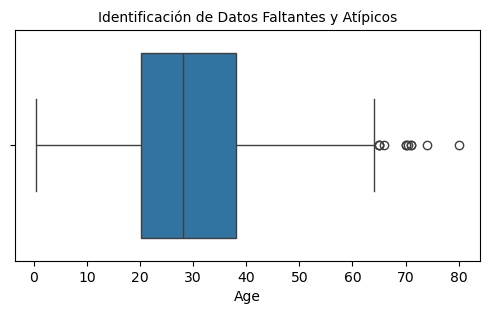

In [27]:
#Identificación de Datos Faltantes y Atípicos

plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['Age'])
plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=10 )

## 2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario

In [46]:
#Revisión de datos faltantes

print("Cantidad de Registros con cero en los Años: ",Datos['Age'].isna().sum())
print("Cantidad de Registros con cero en la Cabina: ",Datos['Cabin'].isna().sum())
print("Cantidad de Registros con cero en la Tarifa: ",Datos['Embarked'].isna().sum())

Cantidad de Registros con cero en los Años:  177
Cantidad de Registros con cero en la Cabina:  687
Cantidad de Registros con cero en la Tarifa:  2


In [56]:
# Reemplazar todos los valores vacíos con el valor medio (promedio) de la columna Edad; y los valores vacíos de Cabina y Embarcado por (Desconocida)

Datos['Age']=Datos['Age'].fillna(Datos['Age'].mean())
Datos['Cabin']=Datos['Cabin'].fillna('Desconocida')
Datos['Embarked']=Datos['Embarked'].fillna('Desconocida')

In [58]:
#Revisión de datos faltantes

print("Cantidad de Registros con cero en los Años: ",Datos['Age'].isna().sum())
print("Cantidad de Registros con cero en la Cabina: ",Datos['Cabin'].isna().sum())
print("Cantidad de Registros con cero en la Tarifa: ",Datos['Embarked'].isna().sum())

Cantidad de Registros con cero en los Años:  0
Cantidad de Registros con cero en la Cabina:  0
Cantidad de Registros con cero en la Tarifa:  0


Text(0.5, 1.0, 'Identificación de Datos Atípicos')

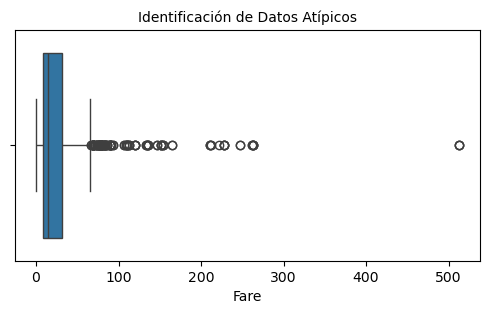

In [62]:
#Identificación de Datos Atípicos

plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['Fare'])
plt.title('Identificación de Datos Atípicos', fontsize=10 )

In [64]:
#Conteo de Datos Atípicos

nivel_minimo=10
nivel_maximo=200
Total_Atipicos=((Datos['Fare']<nivel_minimo)|(Datos['Fare']>nivel_maximo)).sum()
print("El total de datos atípicos es {}".format(Total_Atipicos))

El total de datos atípicos es 356


In [67]:
# Filtra Datos Atípicos

Datos=Datos[(Datos['Fare']<nivel_maximo)&(Datos['Fare']>nivel_minimo)]

In [69]:
# Validar si se removieron los datos atípicos

Total_Atipicos=((Datos['Fare']<nivel_minimo)|(Datos['Fare']>nivel_maximo)).sum()
print("El total de datos atípicos es {}".format(Total_Atipicos))

El total de datos atípicos es 0


In [71]:
#Revisión del tipo de datos y datos faltantes

Datos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 535 entries, 1 to 889
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  535 non-null    int64  
 1   Survived     535 non-null    int64  
 2   Pclass       535 non-null    int64  
 3   Name         535 non-null    object 
 4   Sex          535 non-null    object 
 5   Age          535 non-null    float64
 6   SibSp        535 non-null    int64  
 7   Parch        535 non-null    int64  
 8   Ticket       535 non-null    object 
 9   Fare         535 non-null    float64
 10  Cabin        535 non-null    object 
 11  Embarked     535 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 54.3+ KB


## 3.Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características

Característica de interes:
* Survived: si la persona Sobrevivio o no (0 = no sobrevivio - 1 = si sobrevivio)
* Predecir si una persona sobrevivio del hundimiento del Titanic

In [85]:
# Total de personas Sobrevivientes

Datos['Survived'].value_counts()

Survived
0    274
1    261
Name: count, dtype: int64

In [93]:
Datos[['Survived']].head(10)

,Survived
1,1
3,1
6,0
7,0
8,1
9,1
10,1
11,1
13,0
15,1


## 4. Dividir el dataset en Train y Test para evaluar correctamente el modelo

In [111]:
# Porcentaje de datos para entrenamiento (train) = 75% , y para prueba (test) = 25%

# Se crean variables X y Y para almacenar la información del entrenamiento

X = Datos.drop(["Survived", "Name", "Sex", "Ticket", "Cabin", "Embarked"], axis=1) # Se cargan los datos de train sin los datos de la columna Sobrevivio, Nommbre, sexo, Boleto, Cabina y Embarcado
Y = Datos['Survived'] # Se cargan los datos de train con los datos de la la columna Sobrevivio

#La función train_test_split crea una división de un conjunto de datos en dos bloques uno de entrenamiento y otro de prueba (train and test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, stratify=Y, random_state= 0)


In [113]:
print (X_train)

     PassengerId  Pclass   Age  SibSp  Parch     Fare
456          457       1  65.0      0      0  26.5500
86            87       3  16.0      1      3  34.3750
310          311       1  24.0      0      0  83.1583
344          345       2  36.0      0      0  13.0000
549          550       2   8.0      1      1  36.7500
..           ...     ...   ...    ...    ...      ...
436          437       3  21.0      2      2  34.3750
632          633       1  32.0      0      0  30.5000
333          334       3  16.0      2      0  18.0000
823          824       3  27.0      0      1  12.4750
24            25       3   8.0      3      1  21.0750

[401 rows x 6 columns]


In [115]:
print (Y_train)

456    0
86     0
310    1
344    0
549    1
      ..
436    0
632    1
333    0
823    1
24     0
Name: Survived, Length: 401, dtype: int64


## 5. Entrenar el modelo configurando los diferentes hiperparámetros

In [118]:
# Construir el modelo de regresión logística 

modelo_regresion = LogisticRegression(solver = "liblinear") # liblinear es una libreria para resolver problemas lineales de clasificación y regresión
modelo_regresion.fit (X_train , Y_train)   

# Crea el modelo de prediccion
Prediccion = modelo_regresion.predict(X_test) # la función predict predice los valores a partir del conjunto de datos de validación


In [120]:
print (Y_test)

871    1
860    0
516    1
34     0
673    1
      ..
229    0
297    0
405    0
54     0
735    0
Name: Survived, Length: 134, dtype: int64


In [122]:
print (Prediccion)

[1 0 0 1 0 1 0 0 1 0 1 1 0 0 1 0 1 0 0 0 1 1 0 0 1 1 1 0 1 1 0 0 0 1 0 0 0
 0 1 0 0 0 0 1 1 1 0 0 0 1 1 0 1 0 1 1 1 1 0 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1
 0 0 1 0 1 0 0 1 0 0 1 0 1 1 1 1 0 1 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 0 1 0 0
 1 0 0 1 1 1 0 0 1 0 0 1 1 1 0 0 0 1 0 1 0 0 0]


## 6. Evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-score, etc

In [128]:
# Desempeño del modelo de regresión

print(classification_report(Y_test,Prediccion))

              precision    recall  f1-score   support

           0       0.60      0.64      0.62        69
           1       0.59      0.55      0.57        65

    accuracy                           0.60       134
   macro avg       0.60      0.60      0.60       134
weighted avg       0.60      0.60      0.60       134



## 7. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo

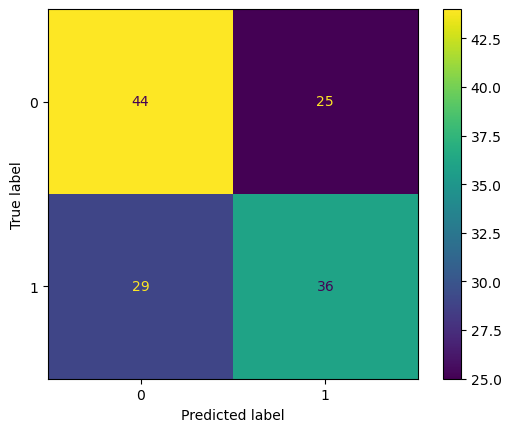

In [131]:
#Matrix de Confusión del modelo

cm=confusion_matrix(Y_test,Prediccion)
disp=metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

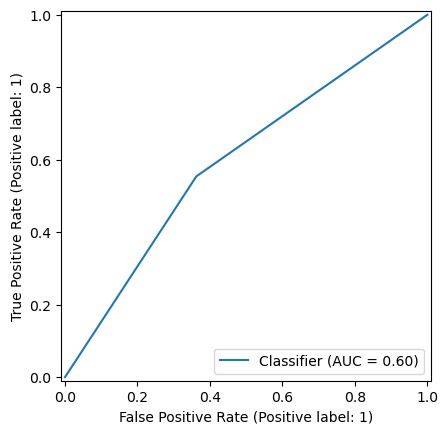

In [133]:
# Curva de precisón del modelo

from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(Y_test, Prediccion)
plt.show()

## 8. Interpretar, analizar y documentar los resultados obtenidos

# Del desempeño del modelo se puede describir:

- Precisión: Precisión mide la proporción de predicciones positivas verdaderas entre todas las predicciones positivas realizadas por el modelo. Aquí la precisión para la clase "Sobrevivio" es 0,59, lo que significa que el 59% de los predichos como Sobrevivientes por el modelo eran en realidad Sobrevivientes.

- Recall: Mide la proporción de predicciones positivas verdaderas entre todas las instancias positivas reales en el conjunto de datos. Aquí el Recall para la clase "Sobrevivio" es 0,55, lo que indica que el modelo identificó correctamente al 55% de todos los Sobrevivientes.

- F1 Score: Es la media armónica de precisión y recuperación. Proporciona una puntuación única que equilibra la Precisión y Recall. Aquí la puntuación F1 para la clase "Sobrevivio" es 0,57, lo que indica un equilibrio similar entre precisión y recuerdo.


# De la Matriz de Confusión podemos interpretar:

- Verdaderos negativos: el recuento de observaciones que un clasificador predijo correctamente como falso 44

- Verdaderos positivos: el recuento de observaciones que un clasificador predijo correctamente como Verdadero 36

- Falsos positivos: el recuento de observaciones que un clasificador predijo incorrectamente como Verdaderas 25

- Falsos negativos: el recuento de observaciones que un clasificador predijo incorrectamente como falso 29

# De la curva de precisión del modelo se puede interpretar:

- El AUC es 0,60 lo que significa que el 60% de las predicciones del clasificador son correctas en todos los umbrales de clasificación.



## 9. Crear una cuenta en GitHub y cargar los códigos de los modelos diseñados https://github.com/